# Capstone Assignment: 
## Initial Report and Exploratory Data Analysis (EDA)

### Overview

This notebook represents an intermediate stage of the final capstone project and focuses on exploratory data analysis (EDA) and initial findings.

This project combines two datasets, one synthetic and one real-world, to explore the following research question:

How do machine learning techniques for predictive maintenance perform when applied to a benchmark dataset with known failure timelines compared to real-world hospital equipment telemetry where explicit failure labels are unavailable?

The project investigates how predictive maintenance and condition monitoring techniques can be applied across two contrasting data environments:

- The NASA C-MAPSS FD001 dataset, a controlled machine-degradation simulation with known failure outcomes.
- The hospital telemetry dataset, reflecting real operational monitoring without recorded failure events.

By comparing Remaining Useful Life (RUL) modeling in the C-MAPSS FD001 dataset with anomaly detection in the hospital telemetry dataset, the project aims to highlight both the capabilities and limitations of machine learning for maintenance decision-making in critical infrastructure environments.

At this stage of the project, the focus is strictly on exploratory data analysis and feature engineering. Advanced modeling techniques will be introduced in the final module. The goal here is to understand the structure, behavior, and limitations of each dataset before formal predictive modeling is applied.

As this capstone forms part of a machine learning curriculum focused primarily on supervised learning techniques, the analytical direction of the project is intentionally aligned toward regression-based modeling approaches. While many alternative analytical strategies could be applied to these datasets, the emphasis of this work is on understanding how regression models behave across both labeled and unlabeled maintenance contexts.

### Objective

The primary objective of this exploratory analysis is to identify patterns, relationships, and potential predictive signals within each dataset.

For the NASA C-MAPSS FD001 dataset, the aim is to understand which operational settings and sensor measurements most strongly influence Remaining Useful Life (RUL).

For the hospital telemetry dataset, the objective is to identify anomalous behavior and potential early warning indicators that may suggest degradation or abnormal operating conditions, even in the absence of explicit failure labels.

As the broader goal of the capstone is to explore predictive modeling for the hospital telemetry dataset, using the NASA C-MAPSS FD001 dataset as a structured benchmark, the analytical emphasis is placed on regression-based techniques. All cleaning, feature engineering, and exploratory steps are therefore performed with downstream supervised modeling considerations in mind.

### Dataset

This project utilizes two primary data sources.

**Dataset A — NASA C-MAPSS Turbofan Engine Degradation Simulation (FD001)**

The C-MAPSS FD001 dataset (`train_FD001.txt`) contains simulated run-to-failure time-series data from 100 turbofan engines operating under a single condition (sea level) and a single fault mode (High-Pressure Compressor (HPC) degradation).

Each engine is recorded over multiple operational cycles and includes:

- Three operational settings
- Twenty-one sensor measurements
- Engine identifier and cycle count

In the training set, engines begin in normal condition and progressively degrade until failure. In the test set, trajectories end before failure, and the objective is to predict Remaining Useful Life (RUL), defined as the number of cycles remaining before failure.

This dataset serves as a controlled benchmark for evaluating degradation behavior and understanding how sensor trends relate to failure progression.

The dataset is publicly available at:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

For this stage of the project, the training dataset is used for exploratory analysis.


**Dataset B — Hospital Diagnostic Imaging Equipment Telemetry**

The hospital telemetry dataset (`data_jan_2025_to_jan_2026.csv`) consists of approximately one year of real-world time-series data collected from four high-power medical imaging systems, two of which are associated with cooling units (chillers).

The dataset includes:

- Average voltage
- Phase currents
- Equipment temperatures
- Timestamped operational measurements

No explicit failure labels or structured maintenance records are available. Equipment identifiers and site-specific information have been anonymized for confidentiality.

Unlike the NASA C-MAPSS FD001 dataset, which reflects a controlled degradation scenario, the hospital telemetry dataset represents real operational complexity, including commissioning noise, maintenance downtime, environmental disturbances, and infrastructure-level electrical events.

While the C-MAPSS FD001 dataset provides a structured degradation reference, the hospital telemetry dataset reflects the practical constraints organizations face when attempting predictive maintenance without labeled failure data.

Due to the fundamentally different data-generating processes, sampling structures, and objectives of the two datasets, exploratory analysis is conducted separately for each before drawing cross-case comparisons.

### Notebook Structure
This notebook, `Capstone_Assignment_20.1_Initial_Report_and_EDA_Jonathan_O'Dea.ipynb`, includes the following sections:

1. Business Understanding
2. Data Understanding
3. Initial assumptions
4. Data Preparation
5. Exploratory Data Analysis
   - 5.1. FD001
   - 5.2. Hospital Telemetry
6. Dataset Comparison and Conclusion
7. Findings & Recommendations
8. Minimal Baseline Models
9. Next Steps

### Summary of Findings

The FD001 benchmark dataset shows clear run-to-failure degradation behaviour, allowing supervised regression for Remaining Useful Life (RUL) using correlated sensor features. In contrast, the hospital telemetry dataset contains real operational variability without labeled failures, with a visible commissioning/stabilization period and intermittent shutdown patterns. No degradation trajectories are observed in the hospital signals; instead, the strongest signals are episodic OFF events and isolated electrical irregularities that appear device- or period-specific.

### Next Steps for Future Modeling

1. FD001: build baseline RUL regressors (Linear → Ridge/Lasso → Polynomial → SVR → Tree/Ensemble) and compare with MAE/RMSE.
2. Hospital telemetry: define a target aligned with available labels (e.g., shutdown prediction in next time window), engineer rolling-window features, and train baseline classifiers (Logistic Regression, Tree/Forest).
3. Validate whether equipment-specific anomalies are predictive (pre-OFF signatures) versus environmental/system-wide events.
4. Finalize model comparison narrative: benchmark (FD001) vs constrained real-world telemetry.

### How to Run
1. The public project repository can be located at: https://github.com/Jonny802/Capstone-Assignment-20.1-Initial-Report-and-EDA
2. Download the project files `Capstone_Assignment_20.1_Initial_Report_and_EDA_Jonathan_O'Dea.ipynb`, `train_FD001.txt`  and `data_jan_2025_to_jan_2026.csv` locally
3. Place the datasets inside a local /data folder
4. Run cells top-to-bottom.

---
---

## 1. Business Understanding 

Predictive maintenance is often presented as a mature and widely applicable solution. However, in practice, many organizations lack the labeled failure data necessary to implement it effectively.

Hospitals operate critical equipment where failures are rare, costly, and often undocumented in structured, machine-readable form. As a result, maintenance strategies are frequently reactive rather than predictive.

This project aims to illustrate the gap between predictive maintenance techniques developed in idealized environments — such as the NASA C-MAPSS FD001 dataset — and the practical challenges encountered when applying similar techniques to real operational data such as the hospital telemetry dataset.

By analyzing both datasets, the project provides insight into:

- What can realistically be inferred from structured degradation data.
- What can be extracted from unlabeled operational telemetry.
- What limitations must be acknowledged when attempting to bridge the two.

At the conclusion of this stage, a clear understanding of each dataset’s structure, behavior, and analytical potential will be established.



---

## 2. Data Understanding

The two datasets address the project objective from different perspectives.

The NASA C-MAPSS FD001 dataset represents a controlled simulation where degradation progression and failure endpoints are known. This allows for direct analysis of how sensor behavior evolves toward failure and how Remaining Useful Life can be estimated.

The hospital telemetry dataset represents a real-world monitoring environment without labeled failure events. Instead of predicting time-to-failure directly, the focus shifts to anomaly detection, operational stability analysis, and identification of potentially actionable irregularities.


**Assumptions for the NASA C-MAPSS FD001 Dataset:**

- Engines begin in healthy condition and degrade gradually.
- The single fault mode produces consistent degradation patterns.
- Operational settings influence sensor readings but remain structurally stable.
- Correlations between sensors and RUL are expected to be meaningful and physically interpretable.

**Assumptions for the Hospital Telemetry Dataset:**

- Equipment experiences irregular OFF states and commissioning noise.
- Electrical disturbances may affect multiple machines simultaneously.
- Anomalies may be either machine-specific or infrastructure-driven.
- The absence of failure labels requires careful interpretation of detected anomalies.

---

## 3. Initial assumptions


In both datasets, the underlying goal is to monitor functional behavior over time and detect meaningful deviations from expected operation. Outliers must be interpreted carefully. In some cases, extreme values may represent sensor error. In others, they may indicate significant operational events.

The NASA C-MAPSS FD001 dataset, being controlled and simulated, is expected to show clearer relationships between degradation and sensor behavior. The hospital telemetry dataset, reflecting real-world operation, is expected to require more extensive cleaning and feature engineering before meaningful conclusions can be drawn.

Together, the two datasets provide complementary perspectives on predictive maintenance, one theoretical and structured, the other practical and constraint-driven.


---

## 4. Data Preparation
Shared imports.

### 4.1. Imports

In [81]:
# --------------------------------------------
# Imports
# --------------------------------------------
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score

#--------------------------------------------
# Future Warning Error Removal
#--------------------------------------------
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 5. Exploratory Data Analysis

Due to the fundamentally different data-generating processes and signal structures of the two datasets, the exploratory data analysis (EDA) is performed separately for each before drawing any comparisons.

### 5.1. NASA Turbofan Jet Engine Data Set - FD001

For this section of the project, only the NASA C-MAPSS FD001 training dataset is used. The objective is to identify which operational settings and sensor measurements most strongly correlate with Remaining Useful Life (RUL), in order to guide the development of regression-based predictive models.

The goal is not simply to visualize correlations, but to understand which variables meaningfully contribute to engine degradation progression under controlled simulation conditions.

#### 5.1.1. C-MAPSS FD001 Data Loading
The FD001 training dataset is loaded and column headers are assigned based on the official dataset documentation. A Remaining Useful Life (RUL) column is generated by subtracting the current cycle count from the maximum cycle count for each engine unit.

In [82]:
#--------------------------------------------
# Load data from txt - NASA Turbofan Jet Engine Data Set - FD001
#--------------------------------------------
# Train
df_train = pd.read_csv("data/train_FD001.txt", sep="\s+", header=None)

#--------------------------------------------
# Applying Functional Headers to the Turbofan Dataset
#--------------------------------------------
# Colummn names sourced from the "Damage Propagation Modeling" document provided from the source archive 

columns = ["unit_id", "time_cycles", "OS1", "OS2", "OS3", "T2", "T24", "T30", "T50", "P2", "P15", "P30", "Nf", "Nc", "epr", "Ps30", "phi", "NRf",
           "NRc", "BPR", "farB", "htBleed", "Nf_dmd", "PCNfR_dmd", "W31", "W32"]
df_train.columns = columns

In [83]:
# --------------------------------------------
# Quick structural checks
# --------------------------------------------
df_train.info()
df_train.nunique()
df_train.isnull().sum()
df_train.groupby('unit_id')['time_cycles'].max().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_id      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   OS1          20631 non-null  float64
 3   OS2          20631 non-null  float64
 4   OS3          20631 non-null  float64
 5   T2           20631 non-null  float64
 6   T24          20631 non-null  float64
 7   T30          20631 non-null  float64
 8   T50          20631 non-null  float64
 9   P2           20631 non-null  float64
 10  P15          20631 non-null  float64
 11  P30          20631 non-null  float64
 12  Nf           20631 non-null  float64
 13  Nc           20631 non-null  float64
 14  epr          20631 non-null  float64
 15  Ps30         20631 non-null  float64
 16  phi          20631 non-null  float64
 17  NRf          20631 non-null  float64
 18  NRc          20631 non-null  float64
 19  BPR 

np.float64(206.31)

In [84]:
max_cycles = df_train.groupby('unit_id')['time_cycles'].max().reset_index()
max_cycles

unit_id  time_cycles
0         1          192
1         2          287
2         3          179
3         4          189
4         5          269
..      ...          ...
95       96          336
96       97          202
97       98          156
98       99          185
99      100          200

[100 rows x 2 columns]

#### 5.1.2. C-MAPSS FD001 Data Analysis

A correlation matrix is generated after computing the RUL column. Since all sensor and operational columns are numerical, the Pandas `.corr()` method is applied directly.

A heatmap is used to visually represent the strength and direction of correlations between each sensor variable and the calculated RUL.

This provides an initial indication of which variables may serve as meaningful predictors during the modeling stage.

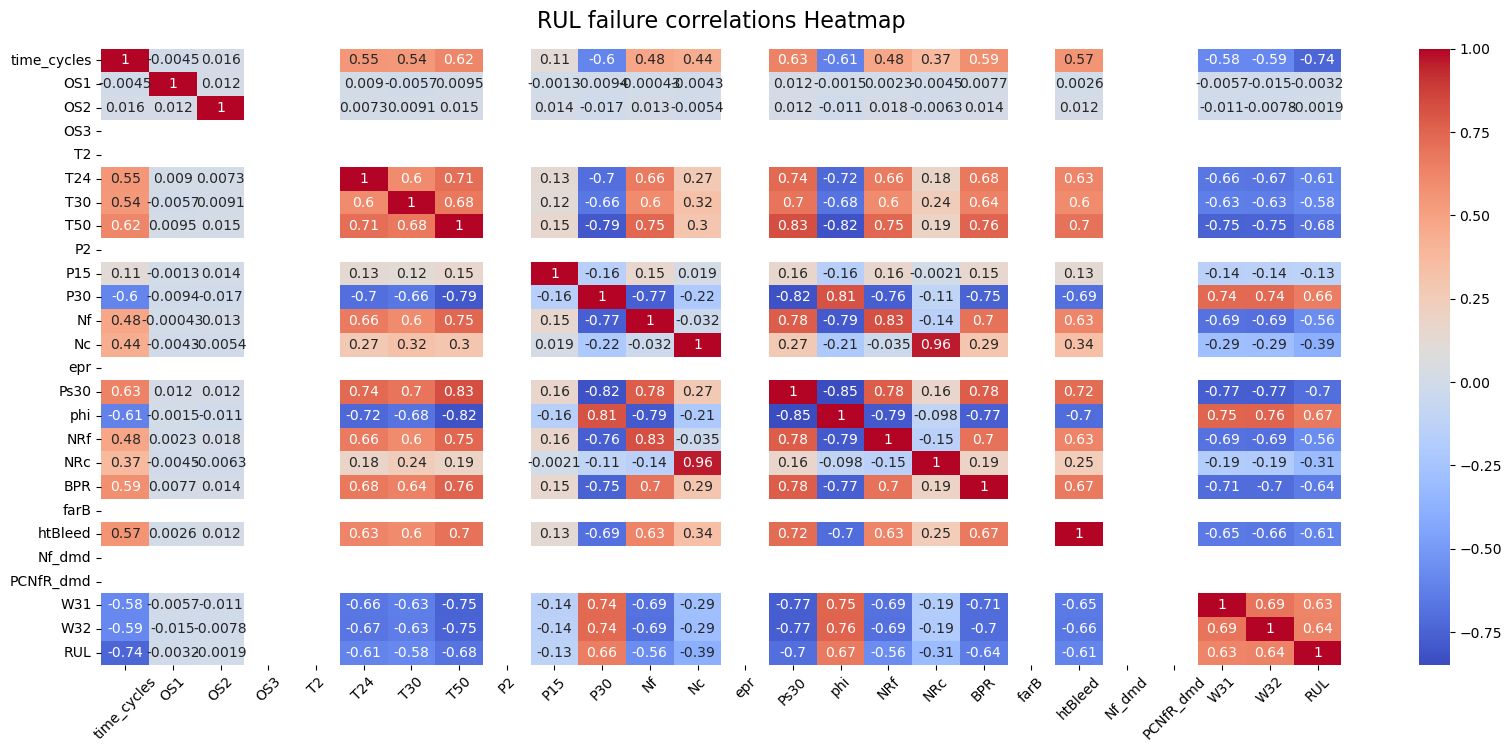

In [85]:
# Remaining Useful Life (RUL) Failure Correlations
# Visually representing elements that contribute to the RUL of the engines

# Get RUL calculations and add extra column to DataFrame
df_train['RUL'] = df_train.groupby('unit_id')['time_cycles'].transform(max) - df_train['time_cycles']

# Plotting the heatmap
numeric_df = df_train.select_dtypes(include = 'number').drop(columns=["unit_id"])
corr = numeric_df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.title('RUL failure correlations Heatmap', size=16, y=1.02)
plt.xticks(rotation=45)
plt.show()

In [86]:
# Examining the correlations -establishing which has the highest influence over RUL

no_only = df_train.loc[:,['P30', 'phi', 'W31', 'W32', 'T24', 'T30', 'T50', 'Nf', 'Nc', 'Ps30', 'BPR', 'htBleed', 'RUL']]
corr_matrix = no_only.corr()

# Correlate based on 'RUL' being the target value
target_corr = corr_matrix['RUL']
highest_corr = target_corr.drop('RUL').abs().idxmax()

print("The column with the highest correlation to 'failure' is:", highest_corr)

The column with the highest correlation to 'failure' is: Ps30


#### 5.1.3. C-MAPSS FD001 EDA Visuals

To complement the correlation analysis, selected sensor trajectories are visualized across individual engines.

Rather than plotting all 100 engines, which produces visual clutter, two randomly selected engines are displayed to illustrate variability in run-to-failure behavior.

The plots intentionally randomize the engine selection to visualize different behaviours and failure points in different engines.

##### Plot 1. Example of Strongly Correlated Variables Across Engines

Two variables with strong correlation to RUL are selected for illustration:

- T30 (Total temperature at HPC outlet) — negatively correlated with RUL
- P30 (Total pressure in HPC) — positively correlated with RUL

The plot illustrates the evolution of T30 (temperature at HPC outlet) and P30 (pressure in HPC) across two randomly selected engines. As engines approach failure, temperature trends generally increase while pressure trends decline, consistent with degradation behavior under the simulated fault mode. Variability across engines demonstrates that degradation progression differs in magnitude and timing, reinforcing the need for multivariate regression modeling.

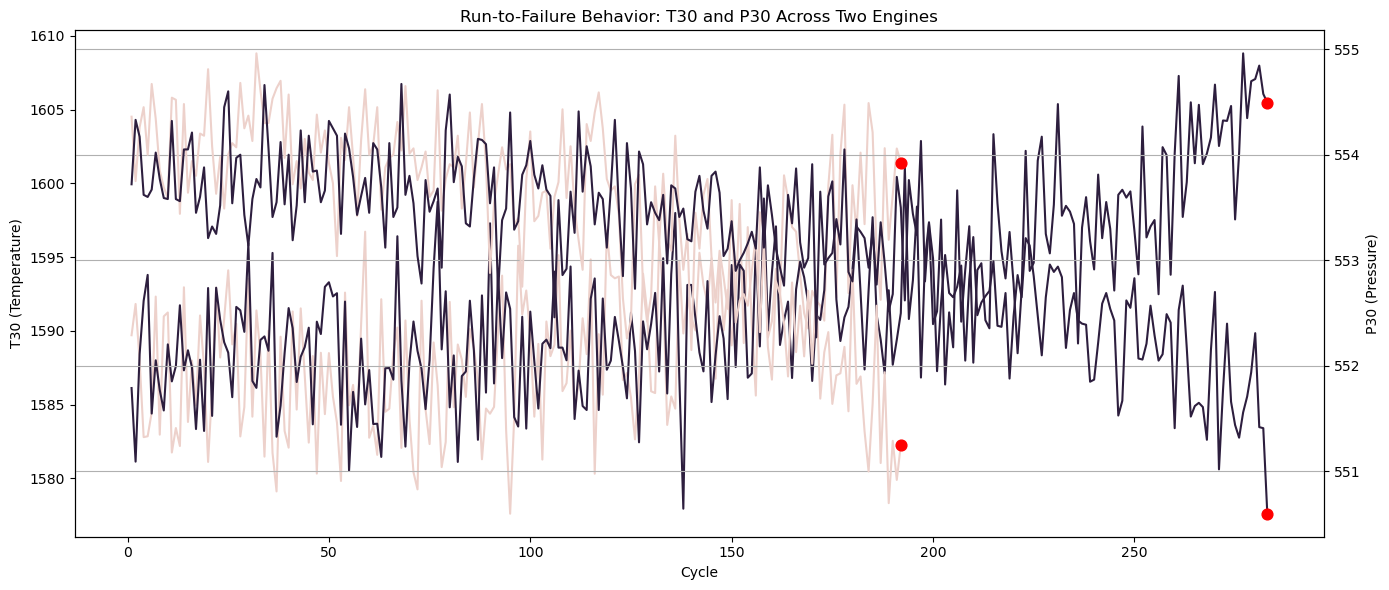

In [87]:
variable_1 = 'T30'   # Total temperature at HPC outlet (negatively correlated with RUL)
variable_2 = 'P30'   # Total pressure in HPC (positively correlated with RUL)
num_engines = 2

# Engine plot randomizer
# will provide a random engine for each run of the cell to understand the change per engine
random_variable = df_train['unit_id'].sample( n = num_engines).unique() 

# create subset to define engine/ variable selection
subset = df_train[df_train['unit_id'].isin(random_variable)].copy()

# Main line plots
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# variable_1 - T30
sns.lineplot(data=subset, x='time_cycles', y=variable_1, hue='unit_id', ax=ax1, legend=False)
# variable_2 - P30
sns.lineplot(data=subset, x='time_cycles', y=variable_2, hue='unit_id', ax=ax2, legend=False)

# Put dot points at the failure point of each engine
last_points = (subset.sort_values('time_cycles').groupby('unit_id', as_index=False).tail(1))
# variable_1 - T30
ax1.scatter(last_points['time_cycles'], last_points[variable_1], color='red', s=60, zorder=5, label='Failure point (last cycle)' )
# variable_2 - P30
ax2.scatter(last_points['time_cycles'], last_points[variable_2], color='red', s=60, zorder=5, label='Failure point (last cycle)' )

ax1.set_xlabel("Cycle")
ax1.set_ylabel("T30 (Temperature)")
ax2.set_ylabel("P30 (Pressure)")
plt.title("Run-to-Failure Behavior: T30 and P30 Across Two Engines")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Plot 2. Physical core speed (Nc) across engines

A second visualization focuses on Nc (core speed) across selected engines.

While Nc exhibits correlation with RUL, it does not independently determine failure timing. Instead, it operates within a broader system of interacting variables.

The overlay of multiple engines demonstrates that:

- Run-to-failure trajectories vary significantly across units.
- Similar core speed ranges do not necessarily imply identical remaining life.
- Degradation is multifactorial rather than governed by a single variable.

This supports the need for multivariate regression modeling.

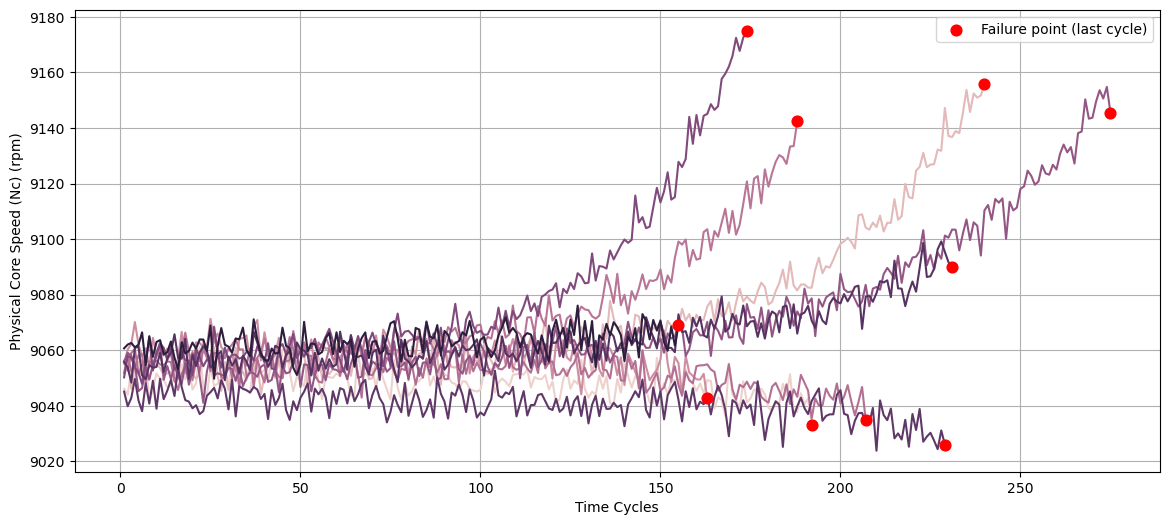

In [88]:
variable = 'Nc'
num_engines = 10

# Engine plot randomizer
random_variable = df_train['unit_id'].sample( n= num_engines).unique() # will provide a random engine for each run of the cell
# create subset to define engine/ variable selection
subset = df_train[df_train['unit_id'].isin(random_variable)].copy()

fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=subset, x='time_cycles', y=variable, hue='unit_id', ax=ax, legend=False)
last_points = (subset.sort_values('time_cycles').groupby('unit_id', as_index=False).tail(1))
ax.scatter(last_points['time_cycles'], last_points[variable], color='red', s=60, zorder=5, label='Failure point (last cycle)' )
plt.xlabel("Time Cycles")
plt.ylabel("Physical Core Speed (Nc) (rpm)")
plt.legend()
plt.grid(True)
plt.show()

#### 5.1.4. C-MAPSS FD001 Feature Engineering and Selection

Given the structured and synthetic nature of the FD001 dataset, minimal feature engineering is required.

Feature selection is guided primarily by correlation analysis. Variables exhibiting negligible influence on RUL are removed to reduce dimensionality and computational redundancy during modeling.

No complex transformations are applied at this stage, as the objective is to maintain interpretability and align with regression-based modeling techniques.

In [89]:
# --------------------------------------------
# Remove constant value columns 
# --------------------------------------------

# These do not assist in any of the calculations and will only hinder the calculation times, so are removed 

df_train = df_train.drop(columns=['OS3', 'T2', 'P2', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd'])

#### 5.1.5. C-MAPSS FD001 Data Cleaning

The FD001 dataset is synthetic and structured. There are no missing values or corrupted records.

Occasional outliers are present; however, these are retained as they reflect realistic operational variability and may represent meaningful stress behavior near failure conditions.

The only data cleaning step applied is the removal of constant-value columns that provide no predictive information.

#### 5.1.6. C-MAPSS FD001 Post Data Revision Analysis

The correlation analysis identifies twelve variables with the strongest relationships to RUL.

**Strongest Positive Correlations with RUL**

(Higher values associated with longer life)

- P30 — Total pressure in HPC
- phi — Fuel flow
- W31 — HPT coolant bleed
- W32 — LPT coolant bleed

**Strongest Negative Correlations with RUL**

(Higher values associated with shorter life)

- T24 — Total temperature at LPC outlet
- T30 — Total temperature at HPC outlet
- T50 — Total temperature at LPT outlet
- Nf — Fan speed
- Nc — Core speed
- Ps30 — Static pressure at HPC
- BPR — Bypass ratio
- htBleed — Bleed enthalpy


These variables represent thermodynamic, pressure, and rotational behaviors that evolve consistently as engines degrade under the simulated fault mode.

The FD001 dataset therefore provides a clean, supervised regression environment in which degradation trajectories are clearly observable and failure endpoints are explicitly defined.

---

### 5.2. Hospital Diagnostic Imaging Equipment Dataset

The hospital telemetry dataset consists of approximately one year of operational measurements collected from four diagnostic imaging systems and two associated chillers.

Unlike the NASA C-MAPSS FD001 dataset, this dataset contains no explicit failure labels or structured maintenance records.

The objective of this exploratory phase is therefore to:

- Establish operational baselines
- Identify anomalous behavior
- Assess whether measurable degradation patterns exist
- Determine whether predictive modeling is feasible given real-world constraints

All preprocessing and feature engineering are performed within the notebook.

#### 5.2.1. Hospital Telemetry Data Loading

Multiple downloads from the data logging platform are combined into a single structured dataset. Timestamp formatting is standardized, and variables are reorganized for clarity.

In [90]:
#--------------------------------------------
# Hospital Diagnostic Imaging Equipment Dataset
#--------------------------------------------
hospital = pd.read_csv('data/data_jan_2025_to_jan_2026.csv')

# Convert time into standard datetime format
hospital['time_utc'] = pd.to_datetime(hospital['time_utc'], dayfirst = True, format='mixed')

#### 5.2.2. Hospital Telemetry Data Cleaning

Two working datasets are maintained:

- `hospital_clean`
- `hospital_analysis`

This separation prevents unintended data corruption during iterative cleaning and feature engineering.

Cleaning steps include:

- Standardizing datetime format,
- Reordering columns for logical grouping,
- Setting extreme scaling spikes to NaN without removing timestamp rows,
- Preserving cross-sensor alignment across machines.

No rows are dropped during cleaning, in order to retain full temporal context.

In [91]:
# Generate a copy of the dataset for cleaning purposes
hospital_clean = hospital.copy()

# Setting the order of the columns in equipment order

new_order = ["time_utc", "Eqpt_1_Avg_V", "Eqpt_2_Avg_V", "Eqpt_3_Avg_V", "Eqpt_4_Avg_V", "Eqpt_1_Avg_A", "Eqpt_2_Avg_A", "Eqpt_3_Avg_A", 
             "Eqpt_4_Avg_A", "Eqpt_1_V_L12", "Eqpt_1_V_L23", "Eqpt_1_V_L31", "Eqpt_2_V_L12", "Eqpt_2_V_L23", "Eqpt_2_V_L31", "Eqpt_3_V_L12", 
             "Eqpt_3_V_L23", "Eqpt_3_V_L31", "Eqpt_4_V_L12", "Eqpt_4_V_L23", "Eqpt_4_V_L31", "Eqpt_1_A_Ph1", "Eqpt_1_A_Ph2", "Eqpt_1_A_Ph3", 
             "Eqpt_2_A_Ph1", "Eqpt_2_A_Ph2", "Eqpt_2_A_Ph3", "Eqpt_3_A_Ph1", "Eqpt_3_A_Ph2", "Eqpt_3_A_Ph3", "Eqpt_4_A_Ph1", "Eqpt_4_A_Ph2", 
             "Eqpt_4_A_Ph3", "Chiller_A_Temp_C", "Chiller_B_Temp_C"]
hospital_clean = hospital_clean.reindex(columns=new_order)

# Set extreme peaks that affect analysis to NaN so other sensors remain usable for that timestamp
# Most likly scaling error during installation/ commissioning noise
hospital_clean.loc[hospital_clean["Eqpt_2_Avg_A"] > 50, "Eqpt_2_Avg_A"] = np.nan 
hospital_clean.loc[hospital_clean["Chiller_A_Temp_C"] > 30, "Chiller_A_Temp_C"] = np.nan
hospital_clean.loc[hospital_clean["Chiller_B_Temp_C"] > 30, "Chiller_B_Temp_C"] = np.nan
hospital_clean.loc[hospital_clean['time_utc'] <= '2025-03-05 00:00:00', 'Eqpt_4_Avg_A'] = np.nan

# Generate a copy of the dataset post cleaning for analysis purposes
hospital_analysis = hospital_clean.copy()

#### 5.2.3. Hospital Telemetry Feature Engineering and Selection

Feature engineering focuses primarily on defining operational tolerance bands for voltage, current, and temperature.

Rather than applying complex transformations, threshold-based logic is used to:

- Define OFF states
- Identify values outside expected operational ranges
- Flag candidate anomalies for further inspection

This approach prioritizes interpretability and aligns with the practical constraints of unlabeled real-world telemetry.

In [92]:
# -----------------------------
# Feature Engineering and Selection
# -----------------------------
# -----------------------------
# Thresholds 
# -----------------------------
# Setting "off" limits to distingush moments when the equiptment is shut down
v_off_limit = 50          # volts: treat <50V as "off"
a_off_limit = 2           # amps: treat <2A as "off"
a3_off_limit = 0        # amps: treat <0A as "off" - different to the other machines
t_off_limit  = 0          # degC: treat 0 as "off"

# Voltage margins based on a 5% band
v_margin = 0.05           # ±5% band for "anomaly" against median voltage baseline

# Machine-specific upper and lower limits based on 99th percentile analysis - values in Amps (A)
a1_upper_limit = 40       
a1_lower_limit = 5        
a2_upper_limit = 22       
a2_lower_limit = 3        
a3_upper_limit = 7      
a3_lower_limit = 0.5        
a4_upper_limit = 8       
a4_lower_limit = 2.5          

# Typical upper range for water-cooled chillers - values in Degrees Celsius (°C) 
t_upper_limit = 30        
t_lower_limit = 5         # typical lower range for water-cooled chillers

# Make a dictionary of off_limits
off_limits = {"voltage": v_off_limit, "current": a_off_limit, "current_a3": a3_off_limit, "temperature": t_off_limit}

# -----------------------------
# Generate a list of selected columns to ovserve 
# -----------------------------
columns = ["Eqpt_1_Avg_V", "Eqpt_2_Avg_V", "Eqpt_3_Avg_V", "Eqpt_4_Avg_V", 
           "Eqpt_1_Avg_A", "Eqpt_2_Avg_A", "Eqpt_3_Avg_A", "Eqpt_4_Avg_A", 
           "Chiller_A_Temp_C", "Chiller_B_Temp_C"]


In [93]:
# Variable analysis to identify appropriate thresholds and cutoffs
print(round(hospital_clean["Eqpt_2_Avg_A"].mean(),2))
print(round(hospital_clean["Eqpt_2_Avg_A"].median(),2))
print(round(hospital_clean["Eqpt_2_Avg_A"].max(),2))
print(round(hospital_clean["Eqpt_2_Avg_A"].quantile(0.99),2))

6.57
3.2
29.53
19.67


#### 5.2.4. Hospital Telemetry Plotting and Data Analysis

The principal variables influencing operational behavior are:

- Average Voltage
- Average Current
- Chiller Temperature

Phase-level readings were reviewed but exhibited no behavior beyond what was already observed in aggregate voltage and current measurements. They remained within phase alignment and did not contribute additional analytical insight, and are therefore excluded from further discussion.

##### 5.2.4.1. Raw Voltage, Current, and Temperature Plots

Interactive plots are generated for each machine, showing:

- Raw signal behavior
- Identified OFF states
- Defined tolerance boundaries
- Flagged anomalies

These plots provide visual context for understanding operational behavior over time.

In [94]:
# Loop to plot the voltage, current and temperature data columns
for col in columns:
    fig = go.Figure()
    x = hospital_analysis['time_utc']
    y = hospital_analysis[col]

# Determine off limit based on values in the column name
    if "_V" in col:
        off_limit = off_limits["voltage"]
    elif "Eqpt_3_Avg_A" in col:
        off_limit = off_limits["current_a3"]
    elif "_Avg_A" in col:
        off_limit = off_limits["current"]    
    else:
        off_limit = off_limits["temperature"]

# Implement what is considered the machine on and off
    off = y.isna() | (y.fillna(0) < off_limit)
    on  = ~off

# Create a baseline and margin to plot limits and identify what are considered abnormal readings based on values in the column name
    baseline = y[on].median()
    
    if "_V" in col:
        lower_tolerance  = baseline * (1 - v_margin)
        upper_tolerance  = baseline * (1 + v_margin)
    elif "Eqpt_1_Avg_A" in col:
        lower_tolerance  = a1_lower_limit
        upper_tolerance  = a1_upper_limit
    elif "Eqpt_2_Avg_A" in col:
        lower_tolerance  = a2_lower_limit
        upper_tolerance  = a2_upper_limit    
    elif "Eqpt_3_Avg_A" in col:
        lower_tolerance  = a3_lower_limit
        upper_tolerance  = a3_upper_limit 
    elif "Eqpt_4_Avg_A" in col:
        lower_tolerance  = a4_lower_limit
        upper_tolerance  = a4_upper_limit     
    else:
        lower_tolerance  = t_lower_limit
        upper_tolerance  = t_upper_limit    
    
# Implement the condition that something is abnormal if the machine is on, and outside of the tolerance ranges
    anomaly = on & ((y < lower_tolerance) | (y > upper_tolerance))

# Plotting:
# Plot only when the machine is considered "on"
    fig.add_trace(go.Scatter(x=x, y=y.where(on), mode="lines", name="ON (operating curve)", line=dict(width=1)))

# Plot points where the machine is considered "off"
    fig.add_trace(go.Scatter(x=x[off], y=np.zeros(off.sum()), mode="markers", name="OFF / missing", marker=dict(size=6)))

# Indicate on the plot where anomolies are detected
    if "_V" in col:
        fig.add_trace(go.Scatter(x=x[anomaly], y=y[anomaly], mode="markers", name = f"Anomaly (±{v_margin*100:.0f}%)",
                                  marker=dict(size=9, color="red", line=dict(width=1, color="black"))))
    else:
        fig.add_trace(go.Scatter(x=x[anomaly], y=y[anomaly], mode="markers", name = f"Anomaly range limit",
                                  marker=dict(size=9, color="red", line=dict(width=1, color="black"))))   
    
# Indicate titles based on values in the column name
    if "_V" in col:
        ptitle = f"{col} - Raw voltage plot with anomaly detection"
        pyaxis = "Voltage (V)"
    elif "_Avg_A" in col:
        ptitle = f"{col} - Raw current plot with anomaly detection"
        pyaxis = "Current (A)"
    else:
        ptitle = f"{col} - Raw chiller temperature plot with anomaly detection"
        pyaxis = "Temperature (°C)"
    
    fig.update_layout(title=ptitle, xaxis_title="time_utc", yaxis_title=pyaxis, template="plotly_white")

# Add in tolerance lines to visually see limits
    if "_V" in col:
        fig.add_hline(y=lower_tolerance, line_dash="dash", line_width=1, annotation_text=f"-{v_margin*100:.0f}% limit")
        fig.add_hline(y=upper_tolerance, line_dash="dash", line_width=1, annotation_text=f"+{v_margin*100:.0f}% limit")
    else:
        fig.add_hline(y=lower_tolerance, line_dash="dash", line_width=1, annotation_text=f" lower limit")
        fig.add_hline(y=upper_tolerance, line_dash="dash", line_width=1, annotation_text=f" upper limit") 
    
# Plot - ensure that zero is always shown to indicate "off" moments
    fig.update_yaxes(rangemode="tozero")
    fig.show()

##### 5.2.4.2. Hospital Telemetry Plot Observational Summary


**Commissioning and Stabilization Period**

Across all four imaging systems, the data indicates a commissioning or stabilization period extending until late September.

This period is characterized by:

- Frequent OFF states
- Irregular voltage and current spikes
- Increased variability across multiple sensors

Eqpt 1 exhibits an extended OFF period due to a documented installation issue resolved in mid-August. This event explains the prolonged early voltage drop and is not interpreted as degradation.

After September, operational patterns stabilize and OFF frequency declines.


**Equipment-Level Observations**

__*Eqpt 1*__

Post-installation, Eqpt 1 demonstrates stable voltage and current behavior within consistent bounds. No progressive instability or increasing shutdown frequency is observed. Chiller temperatures follow a seasonal trend similar to Eqpt 2, suggesting environmental influence.

Overall, Eqpt 1 serves as a stable operational reference unit.

__*Eqpt 2*__

Voltage dips occur periodically, often preceding OFF states, indicating controlled shutdown cycles rather than spontaneous faults. A deviation on December 10 appears isolated and warrants inspection but does not indicate clear degradation.

Chiller behavior closely mirrors Eqpt 1, reinforcing the likelihood of environmental influence.

__*Eqpt 3*__

Generally stable operation is observed. However, in late November and December, voltage drops precede short-duration current spikes. The sequential nature of this pattern increases its analytical relevance and may reflect transient internal response.

__*Eqpt 4*__

Eqpt 4 displays repeated shutdown cycles and voltage/current irregularities in November that are not mirrored by the other machines.

This behavior may reflect:

- Operational scheduling differences
- Lower utilization (backup system)
- Maintenance activity
- Temporary instability

Notably, operation stabilizes in December–January, suggesting resolution of a transient condition rather than ongoing degradation.

Among the four units, Eqpt 4 presents the strongest candidate for device-specific behavioral irregularity during the study period.

**Summary of Observations**

The exploratory analysis reveals:

- A commissioning period common to all machines prior to late September.
- Occasional system-wide voltage disturbances affecting multiple units simultaneously.
- No clear monotonic degradation trend across any machine.
- Isolated behavioral trends (particularly in Eqpt 3 and Eqpt 4) that may warrant deeper investigation.
- Environmental or seasonal effects influencing chiller temperatures.

Unlike the NASA C-MAPSS FD001 dataset, the hospital telemetry dataset does not exhibit clearly defined degradation trajectories culminating in failure. Instead, the data reflects operational variability within stable regimes, punctuated by isolated disturbances and shutdown cycles.

#### 5.2.5. Hospital Telemetry Anomaly Detection and Review

Anomaly detection focuses on identifying timestamps where signals exceed defined operational bands.

Simultaneous anomalies across multiple machines are used to identify likely external events (e.g., electrical disturbances).

Machine-specific anomalies are examined separately to assess whether they indicate operational instability.

Given the absence of failure labels, anomalies are interpreted cautiously and not assumed to represent damage.

In [95]:
# Split the groups into corresponding lists for subsequent loops
voltage = ["Eqpt_1_Avg_V", "Eqpt_2_Avg_V", "Eqpt_3_Avg_V", "Eqpt_4_Avg_V"] 
current = ["Eqpt_1_Avg_A", "Eqpt_2_Avg_A", "Eqpt_3_Avg_A", "Eqpt_4_Avg_A"]
temperature = ["Chiller_A_Temp_C", "Chiller_B_Temp_C"]

In [96]:
# Identification of anomalies in the voltage, current and temperature columns

# Create baselines dictionary for measurements
baselines = {}
for col in voltage:
    y = hospital_analysis[col]
    on = y > v_off_limit
    baselines[col] = y[on].median()

# Voltage anomaly identificaiton
v_anomalies = []

for v in voltage:
    lower_band = baselines[v] * (1 - v_margin)
    upper_band = baselines[v] * (1 + v_margin)
    y = hospital_analysis[v]
    criteria = ((y > v_off_limit) & ((y < lower_band) | (y > upper_band)))
    v_anomaly_df = hospital_analysis[['time_utc', v]][criteria]
    v_anomalies.append(v_anomaly_df)


# Current anomaly identificaiton
a_anomalies = []

for idx, a in enumerate(current):
    if idx == 0:
        lower_band, upper_band = a1_lower_limit, a1_upper_limit
    elif idx == 1:
        lower_band, upper_band = a2_lower_limit, a2_upper_limit
    elif idx == 2:
        lower_band, upper_band = a3_lower_limit, a3_upper_limit
    else:
        lower_band, upper_band = a4_lower_limit, a4_upper_limit   

    y = hospital_analysis[a]
    criteria = ((y > a_off_limit) & ((y < lower_band) | (y > upper_band)))
    a_anomaly_df = hospital_analysis[['time_utc', a]][criteria]
    a_anomalies.append(a_anomaly_df)


# Temperature anomaly identificaiton
t_anomalies = []

for t in temperature:
    lower_band = t_lower_limit
    upper_band = t_upper_limit
    y = hospital_analysis[t]
    criteria = ((y > t_off_limit) & ((y < lower_band) | (y > upper_band)))
    t_anomaly_df = hospital_analysis[['time_utc', t]][criteria]
    t_anomalies.append(t_anomaly_df)


merged_v = pd.concat([df.set_index('time_utc') for df in v_anomalies], axis=1).reset_index()
merged_a = pd.concat([df.set_index('time_utc') for df in a_anomalies], axis=1).reset_index()
merged_t = pd.concat([df.set_index('time_utc') for df in t_anomalies], axis=1).reset_index()

merged_vat = pd.concat([merged_v.set_index('time_utc'), merged_a.set_index('time_utc'), merged_t.set_index('time_utc')], axis=1).reset_index()

# Group them into simultaneous anomalies - 4 indicates that there are four simultaneously occurring events 
merged_vat_filtered = merged_vat.dropna(thresh=4) # - Keep rows that have at least 4 non-NaN anomaly values
merged_vat_filtered_display = merged_vat_filtered.fillna('') # Replaces all NaN with '' to see easier in the plot
merged_vat_filtered_display.head(5)
                                

time_utc Eqpt_1_Avg_V  Eqpt_2_Avg_V  Eqpt_3_Avg_V  \
52  2025-05-23 12:00:00                     362.87        457.13   
232 2025-09-21 15:00:00                     163.52        327.20   
332 2025-10-14 16:00:00                     468.06        468.45   
445 2025-12-06 18:00:00                     468.50        468.86   
447 2025-12-09 16:00:00                     467.35        467.77   

     Eqpt_4_Avg_V Eqpt_1_Avg_A Eqpt_2_Avg_A Eqpt_3_Avg_A Eqpt_4_Avg_A  \
52         461.26                                                       
232        160.81                                                       
332        468.30                                                       
445        468.83                                                       
447        467.65                                                       

    Chiller_A_Temp_C Chiller_B_Temp_C  
52                                     
232                                    
332                                    
445                                    
447

In [97]:
# Review over multiple thresholds
print("≥3 anomalies:", len(merged_vat.dropna(thresh=3)))
print("≥4 anomalies:", len(merged_vat.dropna(thresh=4)))
print("≥5 anomalies:", len(merged_vat.dropna(thresh=5)))

≥3 anomalies: 24
≥4 anomalies: 11
≥5 anomalies: 0


In [98]:
merged_vat_filtered.nunique()

time_utc            11
Eqpt_1_Avg_V         0
Eqpt_2_Avg_V        11
Eqpt_3_Avg_V        10
Eqpt_4_Avg_V        11
Eqpt_1_Avg_A         0
Eqpt_2_Avg_A         0
Eqpt_3_Avg_A         0
Eqpt_4_Avg_A         0
Chiller_A_Temp_C     0
Chiller_B_Temp_C     0
dtype: int64

#### 5.2.6.  Monthly OFF Events vs Average Current (Operational Stability Context)

Monthly OFF events were calculated using voltage thresholds and plotted alongside average current to assess operational stability.

**Eqpt 4** shows elevated shutdown frequency in November with increased variability, but this behaviour stabilizes in subsequent months, suggesting a temporary disturbance rather than progressive degradation.

**Eqpt 2** exhibits periodic shutdowns distributed across the year, likely reflecting controlled operational cycling. An isolated December deviation appears equipment-specific but not part of a sustained trend.

Overall, no machine demonstrates an increasing shutdowns over time, reinforcing that the dataset reflects operational variability rather than clear degradation patterns.

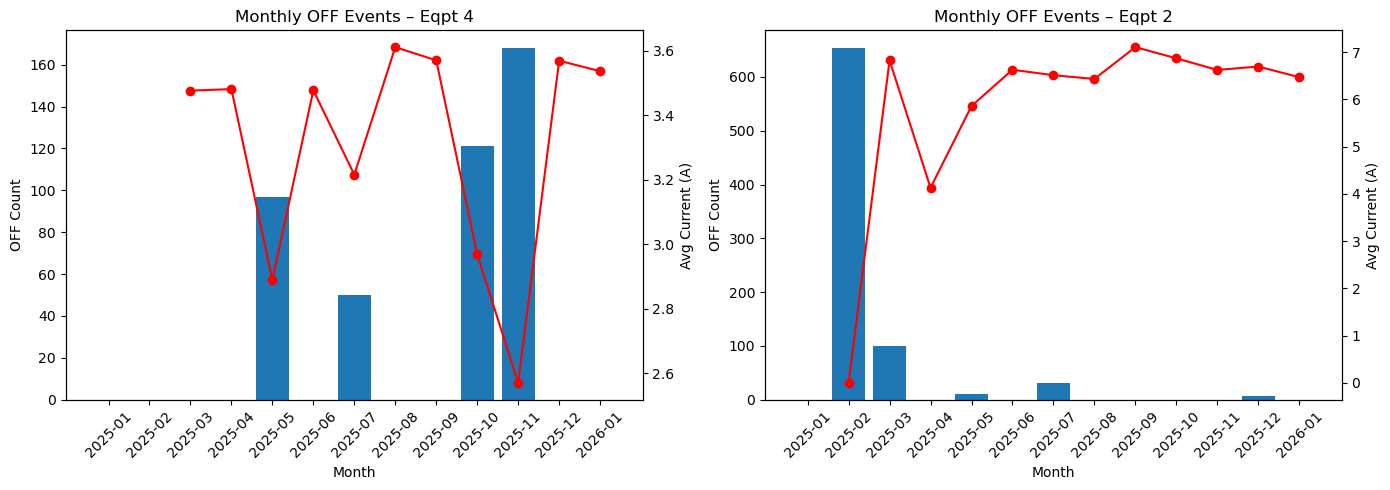

In [99]:
# Create a month column to group
hospital_analysis["month"] = hospital_analysis["time_utc"].dt.to_period("M")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Eqpt 4
# count off events
off4 = hospital_analysis.groupby("month").apply(lambda x: (x["Eqpt_4_Avg_V"] < 50).sum())
# avg current by month
a4 = hospital_analysis.groupby("month")["Eqpt_4_Avg_A"].mean()

# convert month to strings and define plots
x4 = off4.index.astype(str)  
ax = axes[0]
ax2 = ax.twinx()

ax.bar(x4, off4.values)                 
ax2.plot(x4, a4.values, marker="o", color="red")   

ax.set_title("Monthly OFF Events – Eqpt 4")
ax.set_ylabel("OFF Count")
ax2.set_ylabel("Avg Current (A)")
ax.set_xlabel("Month")
ax.tick_params(axis="x", rotation=45)


# Eqpt 2 
off2 = hospital_analysis.groupby("month").apply(lambda x: (x["Eqpt_2_Avg_V"] < 50).sum())
a2 = hospital_analysis.groupby("month")["Eqpt_2_Avg_A"].mean()

x2 = off2.index.astype(str)
ax = axes[1]
ax2 = ax.twinx()

ax.bar(x2, off2.values)
ax2.plot(x2, a2.values, marker="o", color="red")

ax.set_title("Monthly OFF Events – Eqpt 2")
ax.set_ylabel("OFF Count")
ax2.set_ylabel("Avg Current (A)")
ax.set_xlabel("Month")
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

#### 5.2.7. Hospital Telemetry Post Data Revision Analysis

Based on exploratory findings, two primary modeling directions emerge for the hospital telemetry dataset:

1. Modeling operational stability, through structured analysis of shutdown frequency, voltage deviations, and anomaly patterns over time.

2. Predicting imminent shutdown events, using preceding electrical behaviour (voltage and current dynamics) as predictive inputs.

Unlike the FD001 dataset, which provides explicit run-to-failure trajectories and Remaining Useful Life (RUL) labels, the hospital telemetry dataset does not contain structured failure endpoints. As a result, traditional RUL-style regression modeling is not directly applicable.

The final modeling approach will therefore depend on validating whether shutdown behaviour exhibits predictive structure, or whether stability-based scoring provides a more appropriate analytical framework.

### 6. Dataset Comparison and Conclusion

The NASA C-MAPSS FD001 dataset supports supervised regression modeling of Remaining Useful Life under controlled and clearly defined degradation conditions. Sensor trends exhibit structured relationships with RUL, allowing direct regression-based prediction of failure timelines.

In contrast, the hospital telemetry dataset does not demonstrate a clear progressive degradation trajectory comparable to FD001. Instead, it reflects operational variability within stable regimes, punctuated by commissioning effects, shutdown cycles, and isolated equipment-specific irregularities.

However, observable shutdown patterns and localized anomalies suggest that modeling operational behaviour, particularly imminent shutdown events, may be feasible.

This contrast highlights the practical gap between ideal benchmark datasets and real-world telemetry environments, where labeled failure data is often unavailable and predictive maintenance must be reframed around operational behaviour rather than explicit failure prediction.

### 7. Findings & Recommendations

The exploratory analysis yields the following key findings:

- The FD001 dataset exhibits structured degradation behaviour, with clear correlations between sensor variables and Remaining Useful Life.
- The hospital telemetry dataset does not exhibit deterioration trends but shows identifiable commissioning periods, shutdown cycles, and equipment-specific irregularities.
- No sustained increase in shutdown frequency or progressive drift is observed in the hospital data during the study period.
- Device-specific behavioural deviations (notably in Eqpt 3 and Eqpt 4) represent candidate signals for structured anomaly modeling rather than failure prediction.

**Recommendations:**

- Use the FD001 dataset as a benchmark to build and compare regression models for Remaining Useful Life.
- Approach the hospital dataset differently, focusing on operational stability and predicting shutdown events rather than estimating RUL.
- Explore whether changes in voltage and current patterns occur before shutdown events.
- Avoid applying RUL-style modeling to data that does not contain labeled failure timelines.

### 8. Minimal Baseline Models

Simple baseline models are implemented to provide a reference point for future modeling across both datasets.

#### C-MAPSS FD001 Baseline Model

In [100]:
# Select features identified earlier on
features = ["P30", "phi", "W31", "W32", "T24", "T30", "T50", "Nf", "Nc", "Ps30", "BPR", "htBleed"]

X = df_train[features]
y = df_train["RUL"]

# Simple split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Baseline model
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
print("Baseline Linear Regression MAE:", round(mae, 2))

Baseline Linear Regression MAE: 34.01


#### Hospital Telemetry Baseline Model

In [101]:
# Create shutdown target - Eqpt 4 example
hospital_analysis["shutdown_flag"] = (hospital_analysis["Eqpt_4_Avg_V"] < 50).astype(int)

# Feature selection - simple electrical features
features = ["Eqpt_4_Avg_V", "Eqpt_4_Avg_A"]

X = hospital_analysis[features].fillna(0)
y = hospital_analysis["shutdown_flag"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Baseline classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))

Accuracy: 0.9799672935404743
Precision: 0.7225433526011561
Recall: 0.9920634920634921


**FD001 – RUL Regression Baseline**

A Linear Regression model was implemented to predict Remaining Useful Life (RUL) using selected correlated sensor features.

**Result:**

Baseline Linear Regression MAE: 34.01 cycles

This indicates an average prediction error of approximately 34 operational cycles and provides a reference point for more advanced regression models.

**Hospital Telemetry – Shutdown Classification Baseline**

As the hospital dataset contains no failure labels, a Logistic Regression classifier was implemented to predict shutdown events (voltage below operational threshold).

**Results:**

- Accuracy: 0.98
- Precision: 0.72
- Recall: 0.99

The model successfully identified all shutdown events (high recall), indicating that voltage and current behaviour contain detectable structure associated with shutdown states.

### 9. Next Steps

The next stage of the project will focus on implementing and evaluating models aligned with the identified modeling direction for each dataset and combine the findings.